## Logistic regression with regularization from scratch

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df2 = pd.read_csv(r'C:\Users\usrer\Desktop\books for study\4 КУРС\мл\ex2data1.txt', sep=',',header = None)

In [10]:
df2.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [11]:
df2[0].max()

99.82785779692128

In [12]:
df2[1].max()

98.86943574220612

In [13]:
#data normalization 
df2[0] = (df2[0].values - df2[0].min())/(df2[0].max()-df2[0].min())
df2[1]= (df2[1].values - df2[1].min())/(df2[1].max()-df2[1].min())


In [14]:
#creating features (x**2,x**3, etc)
for i in range (25):
    df2[i+3]= (df2[0].values)**2
n=6
for i in range(n+1):
    df2[i+3]= (((df2[0].values)**(i)) * (df2[1].values)**(n-i))
n=5
for i in range(n+1):
    df2[i+10]= (((df2[0].values)**(i+1)) * (df2[1].values)**(n-i))
n=4
for i in range(n+1):
    df2[i+17]= (((df2[0].values)**(i+1)) * (df2[1].values)**(n-i))
n=3
for i in range(n+1):
    df2[i+22]= (((df2[0].values)**(i+1)) * (df2[1].values)**(n-i))
n=2
for i in range(n+1):
    df2[i+25]= (((df2[0].values)**(i+1)) * (df2[1].values)**(n-i))


In [24]:
df2.iloc[:5,25:]

,25,26,27
0,0.031572,0.002974,2.800836e-04
1,0.000124,0.000002,3.484802e-08
2,0.031854,0.004265,5.711227e-04
3,0.287494,0.152119,8.048966e-02
4,0.301512,0.322928,3.458647e-01


In [85]:
X = df2[[0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]]
X=np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
Y = df2[2]
m=len(Y)
itera =400
iterq = list(range(itera))
theta =np.zeros(X.shape[1])
costt = np.zeros((itera))
alpha =0.001
lemda = 1

In [86]:
for i in range(itera):
        thetax=np.dot(X,theta)
        hyp =1/(1+np.exp(-thetax))
        cost =(1/m) * np.sum((-Y*np.log(hyp)-(1-Y)*np.log(1-hyp))) + lemda *np.sum((theta)**2)
        costt[i] =(1/m) * np.sum((-Y*np.log(hyp)-(1-Y)*np.log(1-hyp))) + lemda *np.sum((theta)**2)
        grad = np.dot(X.T, (hyp - Y)) / m + lemda/m * theta
        theta= theta -alpha * grad

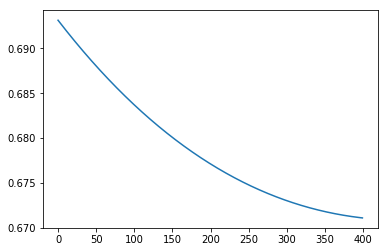

In [87]:
#dependence of cost over iteration
plt.plot(iterq,costt)

In [34]:
theta

array([0.03250943, 0.04680678, 0.0435666 , 0.01881518, 0.01501469,
       0.01197695, 0.01086187, 0.01137424, 0.01379389, 0.01827288,
       0.01501469, 0.01197695, 0.01086187, 0.01137424, 0.01379389,
       0.01827288, 0.03811358, 0.01803186, 0.01513687, 0.01469617,
       0.01672401, 0.02114694, 0.02230514, 0.01999689, 0.02108384,
       0.02859098, 0.02778043, 0.03056716])

In [416]:
def predict( X, threshold=0):
        return np.dot(X, theta) >= threshold

In [418]:
predict([2,-3,1])

False

## Homework

In [4]:
tabl = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,640,620,660,660,680,650,670,580,590,690,550,200,580,680,695,540,500,600,700,620,530,690,720,780,690 ],"gpa":[4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,3,2.7,2.5,2.6,3.5,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7,1.5,2.5,3.4,4,1.3,2.5,3,4,2.4,1.9,2.8,4,3.3,4,3.7,3.9,4,2.4], "work_experience": [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,6,5,1,2,1,4,5,6,4,3,2,6,6,2,3,1,2,5,6,4,3,1,5,2,3],"admitted":[1,1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,1,1,1,1,0,1,1,0,1,1,0,0,0,1,1,0,0,0,0,1,1,1,0,0,1,1,0]}
df = pd.DataFrame(tabl)

In [5]:
df.head()

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,1
3,710,3.7,5,1
4,680,3.9,4,1


In [18]:
df['gmat'] = (df['gmat'].values - df['gmat'].min())/(df['gmat'].max()-df['gmat'].min())
df['gpa']= (df['gpa'].values - df['gpa'].min())/(df['gpa'].max()-df['gpa'].min())
df['work_experience'] = (df['work_experience'].values - df['work_experience'].min())/(df['work_experience'].max()-df['work_experience'].min())
X2 = df[['gmat','gpa','work_experience']]
X2=np.concatenate((np.ones((X2.shape[0], 1)), X2), axis=1)
Y2 = df['admitted']
n=len(Y2)
itera2 =4000
costt = np.zeros((itera2))
iterq = list(range(itera2))
theta2 =np.zeros(X2.shape[1])
alpha =0.001

In [19]:
for i in range(itera2):
        
        thetax2=np.dot(X2,theta2)
        hyp2 =1/(1+np.exp(-thetax2))
        cost2 =(1/n) * np.sum((-Y2*np.log(hyp2)-(1-Y2)*np.log(1-hyp2)))
        costt[i] =(1/n) * np.sum((-Y2*np.log(hyp2)-(1-Y2)*np.log(1-hyp2)))
        grad2 = np.dot(X2.T, (hyp2 - Y2)) / n
        theta2= theta2 -alpha * grad2

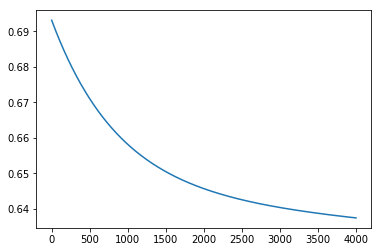

In [20]:
plt.plot(iterq,costt)